<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>MPO 624: Three ways to fit a line to a scatter cloud</h1>
### Valeria Donets edit

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

------------
# Let's fit some lines and see why the regression slopes differ

In [2]:
%pylab inline 
import scipy, scipy.stats
import os
from netCDF4 import Dataset

#Reading data from CONTRAST field campaign
os.chdir(r"C:\Users\Atlas\Desktop\Data_for_Python\CONTRAST");
os.getcwd()

Populating the interactive namespace from numpy and matplotlib


'C:\\Users\\Atlas\\Desktop\\Data_for_Python\\CONTRAST'

In [3]:
dataset=Dataset ('CONTRAST-AWAS-MERGE_GV_R6_COMPOSITE.nc')
print (dataset.file_format)

NETCDF3_CLASSIC


In [4]:
print (dataset.variables.keys())

odict_keys(['Time', 'Flight_Number', 'Julian_Date', 'UTC_YYYY', 'UTC_MO', 'UTC_DD', 'Time_UTC', 'FLT_HH', 'FLT_MM', 'FLT_SS', 'UTC_HH', 'UTC_MM', 'UTC_SS', 'Profile_Number', 'C2H6_Ethane', 'C2H2_Ethyne', 'C3H8_Propane', 'C4H10_Isobutane', 'C4H10_nButane', 'C5H12_Isopentane', 'C5H12_nPentane', 'C5H8_Isoprene', 'C6H6_Benzene', 'OCS_Carbonyl_sulfide', 'C2H6S_Dimethyl_sulfide', 'CCl2F2_CFC_12', 'CCl3F_CFC_11', 'CCl2FCCl2F_CFC112', 'CCl3CClF2_CFC_112a', 'C2Cl3F3_CFC_113', 'C2Cl2F4_CFC_114', 'CHClF2_HCFC_22', 'CH3CClF2_HCFC_142b', 'CH3CCl2F_HCFC_141b', 'CH2FCF3_HFC_134a', 'C4H5F5_HFC365mfc', 'CH3Cl_Methyl_chloride', 'CH3Br_Methyl_bromide', 'CH3I_Methyl_iodide', 'CH2Cl2_Methylene_chloride', 'CHCl3_Chloroform', 'CH3CCl3_Methyl_chloroform', 'CCl4_Carbon_tetrachloride', 'C2H4Cl2_1_2_Dichloroethane', 'C2HCl3_Trichloroethylene', 'C2Cl4_Tetrachloroethylene', 'C6H5Cl_Chlorobenzene', 'CBrClF2_Halon_1211', 'C2Br2F4_Halon_2402', 'CH2BrCl_Bromochloromethane', 'CH2Br2_Methylene_bromide', 'CHBrCl2_Bromodi

C:\Users\Atlas\Anaconda3\envs\MPO624\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


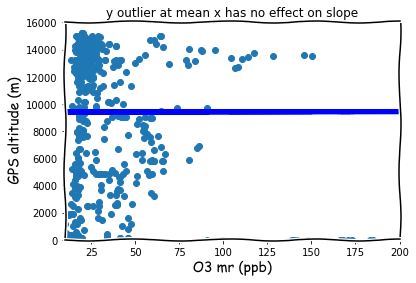

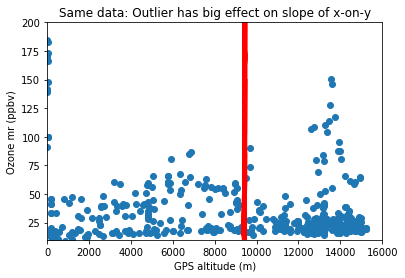

In [5]:
plt.xkcd()
X=dataset.variables['O3_ppbv'][:]
Y=dataset.variables['GGALT'][:]

# let's fit a line, both ways:
slopexy, interceptxy, r_value, p_value, std_err = scipy.stats.linregress(X,Y)
slopeyx, interceptyx, r_value, p_value, std_err = scipy.stats.linregress(Y,X)

# Here's our linear fits:
yfit = [ slopexy*xi + interceptxy for xi in X]
xfit = [ slopeyx*yi + interceptyx for yi in Y]

# plot REGRESSION OF Y ON X (red line)
plt.plot(X,Y,'o')
plt.plot(X,   yfit,'b-', linewidth=5)
#plt.plot(xfit,Y   ,'g-', linewidth=5)
plt.xlim(10,200); plt.ylim(0,)
plt.xlabel("O3 mr (ppb)"); plt.ylabel("GPS altitude (m)"); 
plt.title('y outlier at mean x has no effect on slope')

plt.show()


# plot both lines on X vs. Y
plt.plot(Y,X,'o')
# plt.plot(yfit,X   ,'r-', linewidth=5)
plt.xlim(0,); plt.ylim(10,200)
plt.plot(Y,   xfit,'g-', linewidth=5)
plt.plot(yfit,  X ,'r-', linewidth=5)
plt.xlabel("GPS altitude (m)"); plt.ylabel("Ozone mr (ppbv)")
plt.title('Same data: Outlier has big effect on slope of x-on-y')

plt.show()

Populating the interactive namespace from numpy and matplotlib


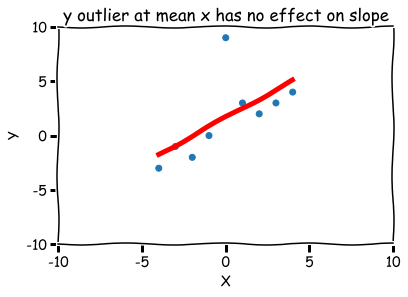

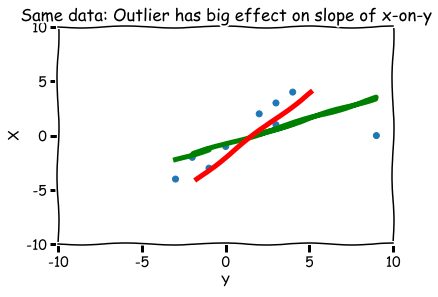

In [2]:
# %pylab inline 
# plt.xkcd()    # Cartoon style, why not? People learn more, research has shown. 
# import scipy, scipy.stats

# # a few data points
# X = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
# Y = [-3, -1, -2,  0, 9, 3, 2, 3, 4]

# # let's fit a line, both ways:
# slopexy, interceptxy, r_value, p_value, std_err = scipy.stats.linregress(X,Y)
# slopeyx, interceptyx, r_value, p_value, std_err = scipy.stats.linregress(Y,X)

# # Here's our linear fits:
# yfit = [ slopexy*xi + interceptxy for xi in X]
# xfit = [ slopeyx*yi + interceptyx for yi in Y]

# # plot REGRESSION OF Y ON X (red line)
# plt.plot(X,Y,'o')
# plt.plot(X,   yfit,'r-', linewidth=5)
# #plt.plot(xfit,Y   ,'g-', linewidth=5)
# #plt.xrange([-8,8]); plt.yrange([-8,8]) guessing name -- no luck. Google it. 
# plt.xlim(-10,10); plt.ylim(-10,10)
# plt.xlabel("X"); plt.ylabel("Y"); 
# plt.title('y outlier at mean x has no effect on slope')

# plt.show()


# # plot both lines on X vs. Y
# plt.plot(Y,X,'o')
# # plt.plot(yfit,X   ,'r-', linewidth=5)
# plt.plot(Y,   xfit,'g-', linewidth=5)
# plt.plot(yfit,  X ,'r-', linewidth=5)
# plt.xlim(-10,10); plt.ylim(-10,10)
# plt.xlabel("Y"); plt.ylabel("X")
# plt.title('Same data: Outlier has big effect on slope of x-on-y')

# plt.show()